In [1]:
from toolkit.logger import Logger
from toolkit.classes import DataFrameCreator
from toolkit.pytorch_tools import CustomImageDataLoader
from toolkit.pytorch_tools import NeuralNetwork
from torchvision.transforms import Compose
from torchvision.transforms import Resize
from torchvision.transforms import Grayscale
from torchvision.transforms import CenterCrop
from torchvision.transforms import ToPILImage
from torchvision.transforms import ToTensor
from torchvision.transforms import RandomHorizontalFlip
from torchvision.transforms import RandomVerticalFlip
from torchvision.transforms import RandomRotation
from torchvision.transforms import RandomPerspective

import torch
import gc

In [2]:
torch.cuda.empty_cache()
gc.collect()
logger = Logger(__name__).get_logger()

In [3]:
data = DataFrameCreator()

In [4]:
data.load_dataset("./data/raw")
data.info()

[    INFO    ] DataFrame created from data/raw/Validation as validation data
[    INFO    ] DataFrame created from data/raw/Train as train data
[    INFO    ] DataFrame created from data/raw/Test as test data
[    INFO    ] Dataset loaded from data/raw folder
[    INFO    ] Name :          train
[    INFO    ] Type:           ('train',)
[    INFO    ] Columns:        ('path', 'filename', 'file', 'type', 'category', 'cat_idx')
[    INFO    ] Shape:          (300, 6)
[    INFO    ] Categories:     ('Non defective', 'Defective')
[    INFO    ] Path:           (PosixPath('data/raw/Train/Non defective'), PosixPath('data/raw/Train/Defective'))
[    INFO    ] File types:     ('jpg',)
[    INFO    ] Name :          validation
[    INFO    ] Type:           ('validation',)
[    INFO    ] Columns:        ('path', 'filename', 'file', 'type', 'category', 'cat_idx')
[    INFO    ] Shape:          (62, 6)
[    INFO    ] Categories:     ('Non defective', 'Defective')
[    INFO    ] Path:           (P

In [5]:
transform = {
    "train": Compose(
        [
            ToPILImage(),
            Grayscale(),
            RandomHorizontalFlip(),
            RandomVerticalFlip(),
            RandomRotation(degrees=(0, 360)),
            RandomPerspective(),
            Resize((32, 32)),
            ToTensor(),
        ]
    ),
    "validation": Compose(
        [ToPILImage(), Grayscale(), Resize((32, 32)), ToTensor()]
    ),
    "test": Compose(
        [ToPILImage(), Grayscale(), Resize((32, 32)), ToTensor()]
    ),
}
target_transform = {"train": None, "validation": None, "test": None}

loader = CustomImageDataLoader(
    dataset=data,
    image_col="file",
    label_col="cat_idx",
    transform=transform,
    target_transform=target_transform,
)
loader.create_dataloaders(batch_size=8)

[    INFO    ] CustomImageDataSet created
[    INFO    ] Setting dataloader subprocesses to 8
[    INFO    ] Dataloaders created


In [6]:
model = NeuralNetwork(name="AlexNet")
model.init_device()

[    INFO    ] Results filename: results/LeNet-5/20230222_222201.csv
[    INFO    ] Neural Network constructed: LeNet-5
[    INFO    ] NeuralNetwork(
  (layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=1, bias=True)
  )
  (loss): BCELoss()
)
[    INFO    ] Setting up CUDA device
[    INFO    ] CUDA set up to device: NVIDIA GeForce MX150
[    INFO    ] Model loaded to device: NVIDIA GeForce MX150


In [7]:
epochs = 200

model.train(epochs=epochs, train_loader=loader["train"], validation_loader=loader["validation"])

[    INFO    ] Model training started
[    INFO    ] Epoch:    0 Loss:  0.6940 Accuracy  0.5000  Validation loss:  0.6943   Validation accuracy:  0.4978
[    INFO    ] Epoch:    1 Loss:  0.6941 Accuracy  0.4989  Validation loss:  0.6943   Validation accuracy:  0.4978


In [8]:
model.results.data

,loss,accuracy,validation_loss,validation_acc
0,0.694003,0.500000,0.694287,0.497768
1,0.694084,0.498904,0.694283,0.497768


In [9]:
model.results.save_data()

[    INFO    ] Results saved to: results/LeNet-5/20230222_222201.csv


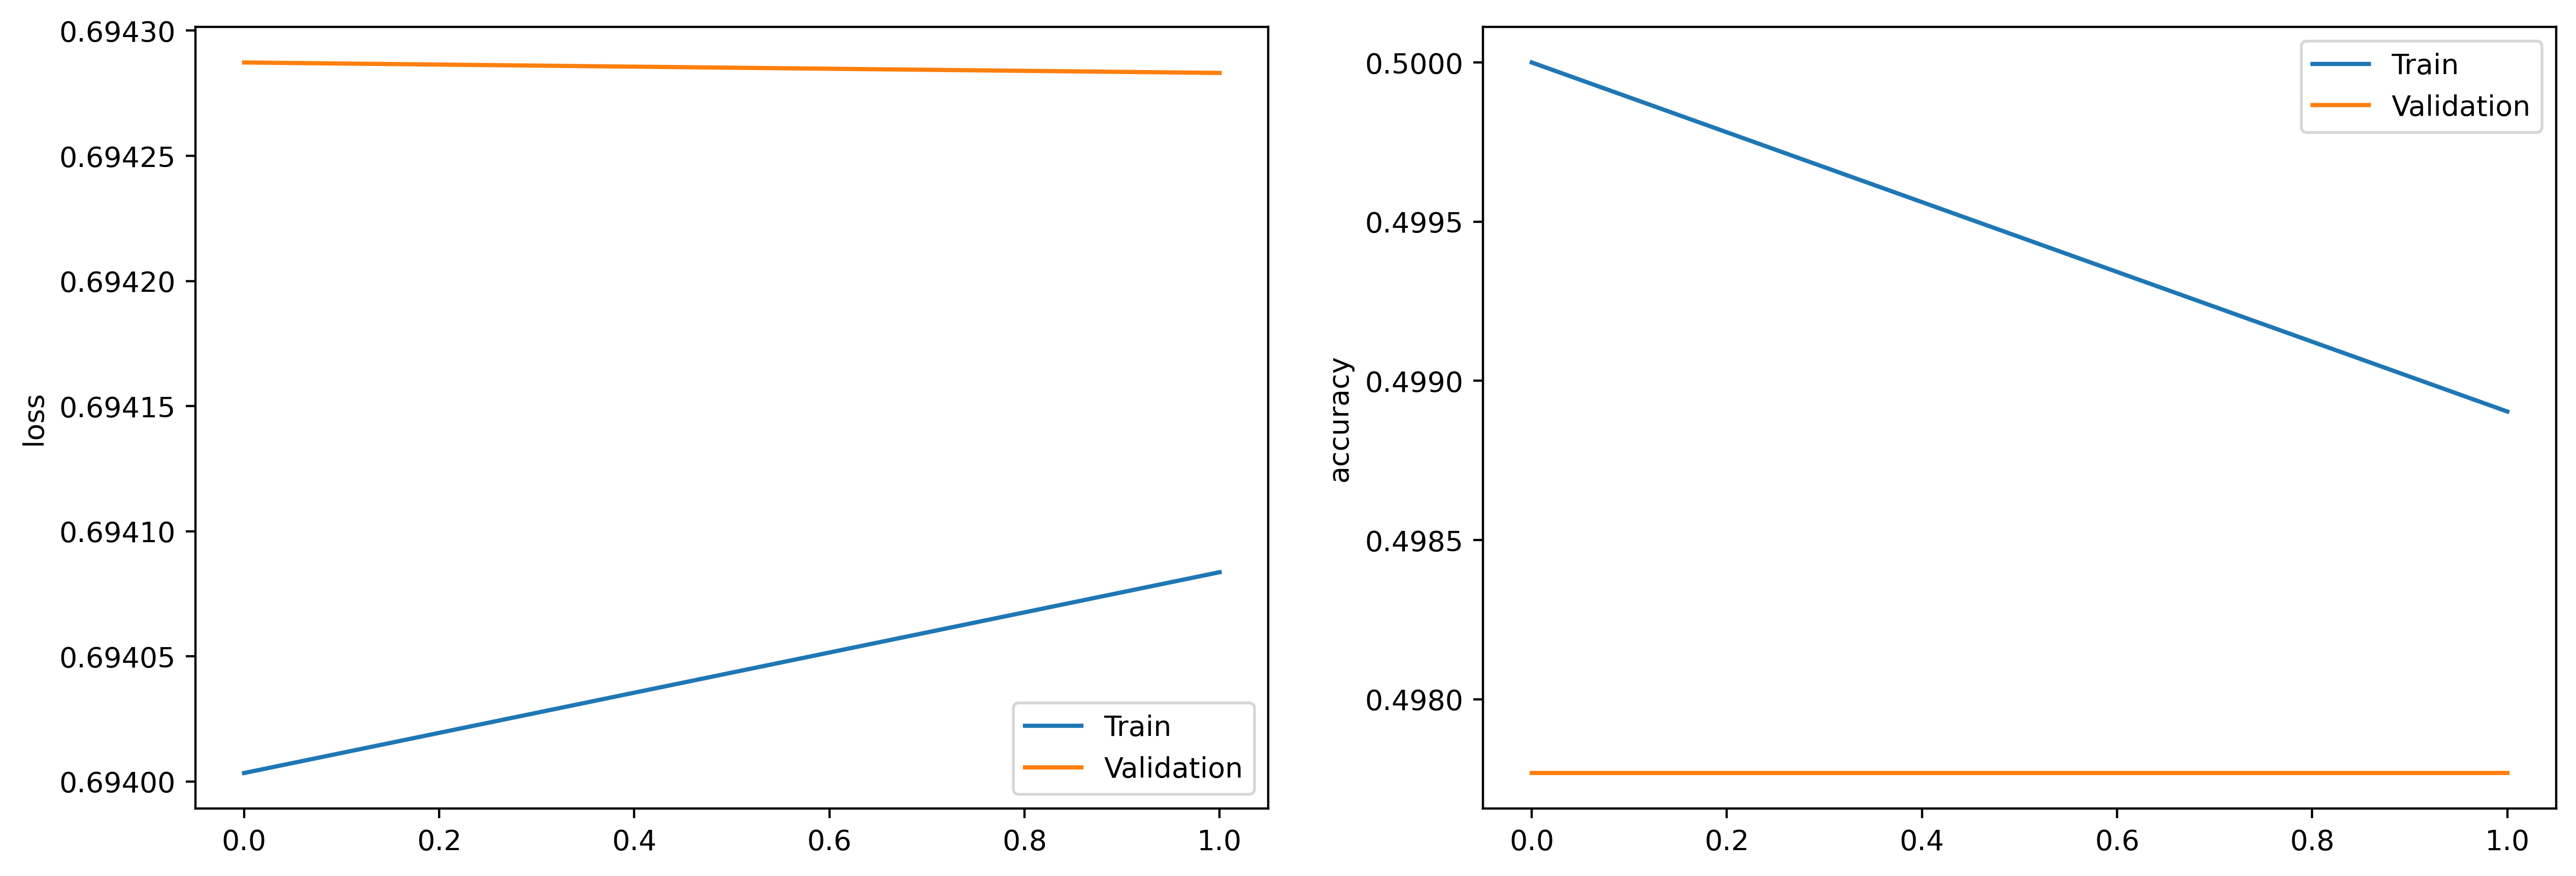

In [10]:
model.results.plot()

In [11]:
model.results.create_dashboard()

In [12]:
model.results.app.run_server()

Dash app running on http://127.0.0.1:8050/
